In [ ]:
data_dir = './data/'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

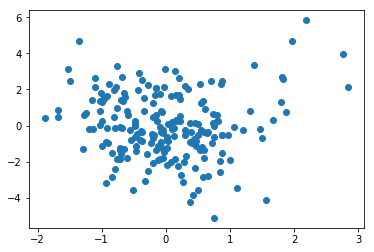

In [4]:
#########################################
##### 演習1： Data Height_weight
#########################################
ais = pd.read_csv(data_dir+'ais.csv')
X = ais[['Ht', 'Wt', 'LBM', 'BMI']] #PCAする要素を取り出す
Y = ais['Sex'] #後からplotを色分けするためにYとして取り出す

X_scaled = (X-X.mean())/X.std()

pca = PCA(n_components=2)
pca.fit(X_scaled)
reduced_ais = pca.fit_transform(X_scaled)

plt.scatter(reduced_ais[:,1],reduced_ais[:,0])


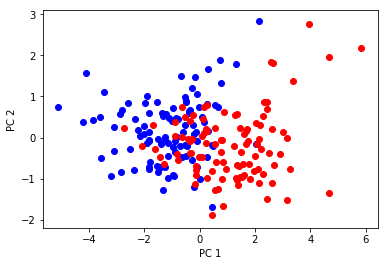

[0.80841085 0.16822152]
[[ 0.45347541  0.55219103  0.53648712  0.4490286 ]
 [-0.68952588  0.08198067 -0.09820659  0.71287354]]


In [5]:
## 発展
colors = ['blue', 'red']
uniqueY = pd.unique(Y) #重複する要素を取りだす（今回は性別で0,1が取り出される）
for i in range(len(uniqueY)):
	Yi = uniqueY[i]
	color = colors[i]
	plt.scatter(reduced_ais[np.where(Y== Yi), 0], reduced_ais[np.where(Y == Yi), 1], c=color)

plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.show()


print(pca.explained_variance_ratio_)

print(pca.components_)

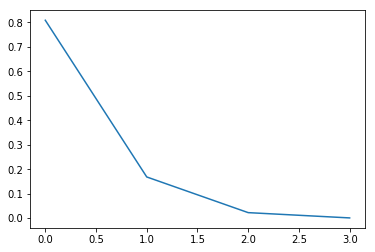

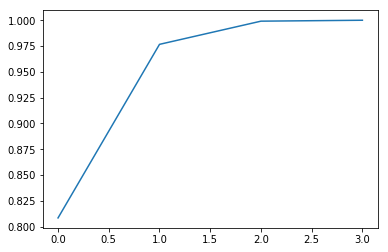

In [6]:
pca = PCA(n_components=X_scaled.shape[1])#PCAをする関数を定義
pca.fit(X_scaled)#X_scaledを使ってPCAを行う（二次関数の係数を決めるイメージ）
reduced_ais = pca.fit_transform(X_scaled)

plt.plot(pca.explained_variance_ratio_)
plt.show()

#寄与率のプロット
sum_ratio = 0
sum_ratio_list = []
#pca.explained_variance_ratio_で寄与率が取り出せる
for r in pca.explained_variance_ratio_:
    sum_ratio = sum_ratio + r
    sum_ratio_list.append(sum_ratio)


plt.plot(sum_ratio_list)


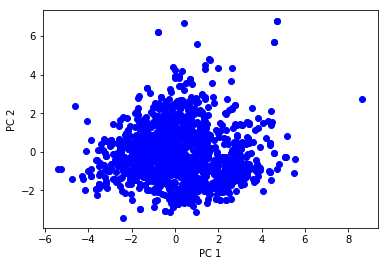

[0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311  0.01648483 0.00541439]
[[ 0.48931422 -0.23858436  0.46363166  0.14610715  0.21224658 -0.03615752
   0.02357485  0.39535301 -0.43851962  0.24292133 -0.11323206]
 [-0.11050274  0.27493048 -0.15179136  0.27208024  0.14805156  0.51356681
   0.56948696  0.23357549  0.00671079 -0.03755392 -0.38618096]
 [-0.12330157 -0.44996253  0.23824707  0.10128338 -0.09261383  0.42879287
   0.3224145  -0.33887135  0.05769735  0.27978615  0.47167322]
 [-0.22961737  0.07895978 -0.07941826 -0.37279256  0.66619476 -0.04353782
  -0.03457712 -0.17449976 -0.00378775  0.55087236 -0.12218109]
 [-0.08261366  0.21873452 -0.05857268  0.73214429  0.2465009  -0.15915198
  -0.22246456  0.15707671  0.26752977  0.22596222  0.35068141]
 [ 0.10147858  0.41144893  0.06959338  0.04915555  0.30433857 -0.01400021
   0.13630755 -0.3911523  -0.52211645 -0.38126343  0.36164504]
 [-0.35022736 -0.5337351   0.10549701  0.29066341  0.3

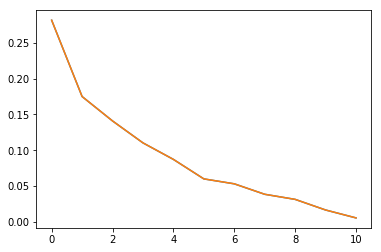

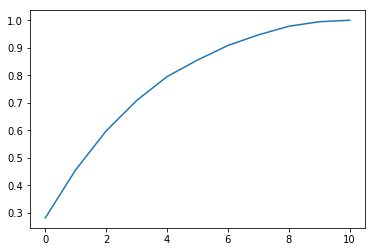

In [8]:
#############################################
######## 演習2： Data Wine ##########################
#############################################

#wineのデータを読み込み
Wine = pd.read_csv(data_dir+'winequality-red.csv',sep=';')
X = Wine.drop('quality', axis=1)#PCAに使わない要素以外を取り出し

X_scaled = (X-X.mean())/X.std()

#PCAする関数を定義->係数決定->データをPCAして主成分を二個取り出す
pca = PCA(n_components=2)
pca.fit(X_scaled)
reduced_Wine = pca.fit_transform(X_scaled)

plt.scatter(reduced_Wine[:,0], reduced_Wine[:,1], c='blue')

plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.show()

#PCAする関数を定義->係数決定->データをPCAして主成分を11個取り出す
pca = PCA(n_components=11)
pca.fit(X_scaled)
R = pca.explained_variance_ratio_
plt.plot(R)

print(pca.explained_variance_ratio_)
print(pca.components_)

#PCAする関数を定義->係数決定->データをPCAして主成分を要素数分取り出す
pca = PCA(n_components=X_scaled.shape[1])
pca.fit(X_scaled)
reduced_HW = pca.fit_transform(X_scaled)

plt.plot(pca.explained_variance_ratio_)
plt.show()

#寄与率のプロット
sum_ratio = 0
sum_ratio_list = []
#pca.explained_variance_ratio_で寄与率が取り出せる
for r in pca.explained_variance_ratio_:
    sum_ratio = sum_ratio + r
    sum_ratio_list.append(sum_ratio)


plt.plot(sum_ratio_list)


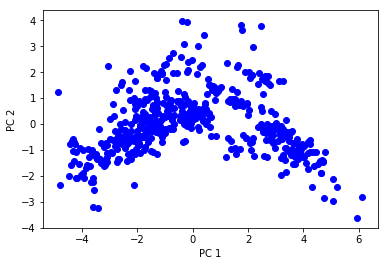

[0.47129607 0.11025193]
[[ 0.2509514  -0.25631454  0.34667207  0.00504243  0.34285231 -0.18924256
   0.31367059 -0.32154386  0.31979277  0.33846915  0.20494228 -0.20297261
   0.30975984]
 [-0.31525233 -0.32331294  0.11249282  0.45482912  0.21911556  0.14933156
   0.31197778 -0.34907001 -0.27152114 -0.23945341 -0.30589698  0.23855944
  -0.07432201]]


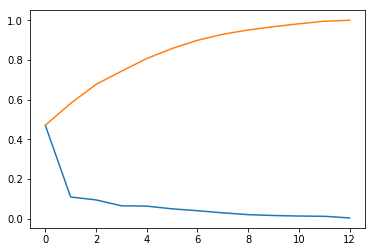

In [9]:
#########################################
##### 演習3： Data boston_house ##################
######################################
Boston = pd.read_csv(data_dir+'boston_house.csv')
X = Boston.drop('MV', axis=1)

X_scaled = (X-X.mean())/X.std()

pca = PCA(n_components=2)
pca.fit(X_scaled)
reduced_Boston = pca.fit_transform(X_scaled)

plt.scatter(reduced_Boston[:,0],reduced_Boston[:,1], c='blue')

plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.show()

print(pca.explained_variance_ratio_)
print(pca.components_)


pca = PCA(n_components=X_scaled.shape[1])
pca.fit(X_scaled)
reduced_HW = pca.fit_transform(X_scaled)

plt.plot(pca.explained_variance_ratio_)
plt.show()

#寄与率のプロット
sum_ratio = 0
sum_ratio_list = []
#pca.explained_variance_ratio_で寄与率が取り出せる
for r in pca.explained_variance_ratio_:
    sum_ratio = sum_ratio + r
    sum_ratio_list.append(sum_ratio)


plt.plot(sum_ratio_list)


Explained variance ratio:  [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.00541439
 0.01648483 0.0313311  0.03845061 0.05307193 0.05996439]
the 2 principal vectors: 
 [[ 0.48931422 -0.23858436  0.46363166  0.14610715  0.21224658 -0.03615752
   0.02357485  0.39535301 -0.43851962  0.24292133 -0.11323206]
 [-0.11050274  0.27493048 -0.15179136  0.27208024  0.14805156  0.51356681
   0.56948696  0.23357549  0.00671079 -0.03755392 -0.38618096]
 [-0.12330157 -0.44996253  0.23824707  0.10128338 -0.09261383  0.42879287
   0.3224145  -0.33887135  0.05769735  0.27978615  0.47167322]
 [-0.22961737  0.07895978 -0.07941826 -0.37279256  0.66619476 -0.04353782
  -0.03457712 -0.17449976 -0.00378775  0.55087236 -0.12218109]
 [-0.08261366  0.21873452 -0.05857268  0.73214429  0.2465009  -0.15915198
  -0.22246456  0.15707671  0.26752977  0.22596222  0.35068141]
 [-0.63969145 -0.0023886   0.0709103  -0.18402996 -0.05306532  0.05142086
  -0.0687016   0.5673319  -0.3407109  -0.06955538  0.31452591]


Text(0, 0.5, 'pc2')

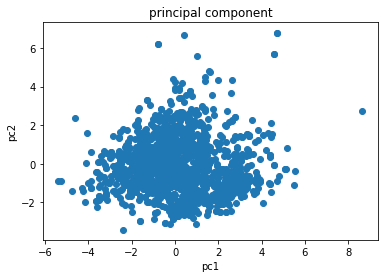

In [10]:
#########################################
##### 演習4： Data wine ##################
######################################

Wine = pd.read_csv(data_dir+'winequality-red.csv',sep=';')
X = Wine.drop('quality', axis=1)

# Normalize the data
X_scaled = (X-X.mean())/X.std()
#X_scaled = (X-X.mean())

# Transform input data into an np.array
Y = np.array(X_scaled)

# Compute the covariance matrix
cov_matrix = np.cov(Y.transpose())

# Compute the eigen values and eigen vectors
(l,V) = np.linalg.eig(cov_matrix)

print("Explained variance ratio: ", l/l.sum())
print("the 2 principal vectors: \n", V.transpose())

# 比較
pca = PCA(n_components=2)
pca.fit(X_scaled)
print(pca.explained_variance_ratio_)
print(pca.components_)

A = pca.components_

# 分析結果を元にデータセットを主成分に変換する
transformed = pca.fit_transform(Y)

# 第二主成分までで可視化する
plt.scatter(transformed[:, 0], transformed[:, 1])
plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')

